<a href="https://colab.research.google.com/github/manasseh-fikadu/A2SV-Competitive-programming/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cluster 0:
  versicolor: 47
  virginica: 14
Cluster 1:
  virginica: 36
  versicolor: 3
Cluster 2:
  setosa: 50
Accuracy: 0.02
Cluster 0: 2 points assigned to centroid (5.883606557377049, 2.7409836065573767, 4.388524590163934, 1.4344262295081966)
Cluster 1: 2 points assigned to centroid (6.853846153846154, 3.076923076923077, 5.7153846153846155, 2.0538461538461537)
Cluster 2: 2 points assigned to centroid (5.006, 3.428, 1.462, 0.24600000000000002)


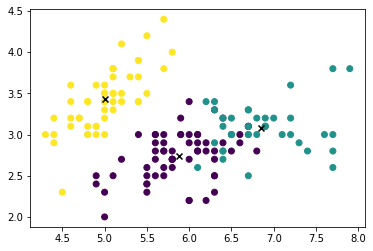

In [ ]:
from typing import Tuple, Iterable, Sequence, List
from random import sample
from math import fsum, sqrt
from collections import defaultdict

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()

def euclidean_distance(a: Sequence[float], b: Sequence[float]) -> float:
    return sqrt(fsum((x - y) ** 2 for x, y in zip(a, b)))

def k_means(data: Iterable[Sequence[float]], k: int, max_iter: int = 100) -> Tuple[List[Sequence[float]], List[int]]:
    # randomly select k points from the data as initial centroids
    centroids = sample(list(data), k)
    for _ in range(max_iter):
        # assign each data point to the closest centroid
        assignments = [min(range(k), key=lambda i: euclidean_distance(x, centroids[i])) for x in data]
        # recompute the centroids as the mean of the assigned points
        centroids = [tuple(fsum(x[i] for x in data) / len(data) for i in range(len(data[0]))) for data in [[x for x, a in zip(data, assignments) if a == i] for i in range(k)]]

    return centroids, assignments

# cluster the data into 3 groups
centroids, assignments = k_means(data.data, 3)

# show the distribution of labels in each of the clusters
for i in range(3):
    counts = defaultdict(int)
    for label, assignment in zip(data.target, assignments):
        if assignment == i:
            counts[data.target_names[label]] += 1
    print(f"Cluster {i}:")
    for label, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
        print(f"  {label}: {count}")

# check the accuracy of the clustering
correct = 0
for label, assignment in zip(data.target, assignments):
    if label == assignment:
        correct += 1
print(f"Accuracy: {correct / len(data.target)}")

# print the results
for i, (centroid, assignment) in enumerate(zip(centroids, assignments)):
    print(f"Cluster {i}: {assignment} points assigned to centroid {centroid}")

# plot the clusters and centroids on a 2d plane
plt.scatter(data.data[:, 0], data.data[:, 1], c=assignments)
plt.scatter([c[0] for c in centroids], [c[1] for c in centroids], c="black", marker="x")
plt.ion()
plt.show()

**Note**: I have passed a max_iter value to the kmeans functions that would allow it to relocate it's centroids max_iter times.

In addition: We can replace the line
```
centroids = [tuple(fsum(x[i] for x in data) / len(data) for i in range(len(data[0]))) for data in [[x for x, a in zip(data, assignments) if a == i] for i in range(k)]]

```
With this: to make it more clear

```
centroids = []
for i in range(k):
  data = [x for x, a in zip(data, assignments) if a == i]
  centroids.append(tuple(fsum(x[i] for x in data) / len(data) for i in range(len(data[0]))))
```
